# 1. Первоначальный сбор данных

In [5]:
# Импортируем нужные библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
from scipy import stats
%matplotlib inline

Cобираем и читаем наборы данных об играх и игроках ATP.

In [25]:
# Читаем и сохраняем наборы данных игр для каждого года (они имеют разные расширения)
datasets_list = []
for i in range(25):
    if (i < 13):
        exec("df" + str(i) + " = pd.read_excel('.../datasets/atp_20" + (("0" + str(i))[-2:]) + ".xls')")
    else:
        exec("df" + str(i) + " = pd.read_excel('.../datasets/atp_20" + (("0" + str(i))[-2:]) + ".xlsx')")
        
    exec("datasets_list.append(df" + str(i) + ")")

# Объединяем все 22 набора данных с играми в один для получения более подробной информации
games_df = pd.concat(datasets_list, ignore_index=True)
    
# Читатем и сохраняем набор данных игроков
players_df = pd.read_csv('.../datasets/atp_players.csv')

B:\Python\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
B:\Python\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
B:\Python\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
B:\Python\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


# 2. Описание данных

Посмотрим, какие данные лежат в atp_2000.xls - atp_2022.xlsx files

In [26]:
# Количество столбцов и колонок
print('Набор данных games_df имеет', games_df.shape[0], "колонок с", games_df.shape[1], "столбцами") 

Набор данных games_df имеет 66702 колонок с 54 столбцами


In [27]:
# Первая треть столбцов для игрового набора данных
games_df.sample(frac=1).loc[:, 'ATP':'L3']

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,W1,L1,W2,L2,W3,L3
19858,53,Bucharest,Open Romania,2006-09-13,International,Outdoor,Clay,2nd Round,3.0,Mayer F.,Roitman S.,53.0,110.0,6.0,4.0,6,1,NaN,NaN
4514,36,Nottingham,Nottingham Open,2001-06-18,International,Outdoor,Grass,2nd Round,3.0,Johansson T.,Stoliarov A.,16,93,7.0,5.0,6.0,0.0,NaN,NaN
59545,23,Monte Carlo,Monte Carlo Masters,2022-04-13,Masters 1000,Outdoor,Clay,2nd Round,3.0,Schwartzman D.,Fucsovics M.,16,57.0,6.0,0.0,7.0,6.0,NaN,NaN
4256,32,St. Polten,Internationaler Raiffeisen Grand Prix,2001-05-21,International,Outdoor,Clay,1st Round,3.0,Gustafsson M.,Stoliarov A.,62,97,7.0,6.0,6.0,3.0,NaN,NaN
16541,46,Sopot,Idea Prokom Open,2005-08-04,International,Outdoor,Clay,2nd Round,3.0,Mayer F.,Volandri F.,95,33.0,6.0,3.0,7,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11975,8,San Jose,Siebel Open,2004-02-13,International,Indoor,Hard,2nd Round,3.0,Johansson J.,Blake J.,77.0,37.0,6.0,4.0,6.0,2.0,NaN,NaN
4862,44,Umag,Croatia Open,2001-07-16,International,Outdoor,Clay,1st Round,3.0,Mantilla F.,Hantschk M.,82,147,7.0,6.0,6.0,2.0,NaN,NaN
5796,65,Basel,Swiss Indoors,2001-10-22,International,Indoor,Carpet,Quarterfinals,3.0,Federer R.,Roddick A.,13,16,3.0,6.0,6.0,3.0,7.0,6.0
12269,18,Indian Wells,Pacific Life Open,2004-03-12,Masters,Outdoor,Hard,1st Round,3.0,Lapentti N.,Ramirez-Hidalgo R.,62.0,69.0,6.0,2.0,6.0,3.0,NaN,NaN


In [28]:
# Вторая треть столбцов набора данных
games_df.sample(frac=1).loc[:, 'W4':'EXW']

,W4,L4,W5,L5,Wsets,Lsets,Comment,CBW,CBL,GBW,GBL,IWW,IWL,SBW,SBL,B365W,B365L,B&WW,B&WL,EXW
51487,NaN,NaN,NaN,NaN,2.0,1.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.800,1.90,NaN,NaN,1.8
8819,NaN,NaN,NaN,NaN,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1.2,3.3,NaN,NaN,1.143,5.00,1.13,4.25,NaN
14147,NaN,NaN,NaN,NaN,2.0,0.0,Completed,1.55,2.40,NaN,NaN,1.6,1.9,NaN,NaN,1.615,2.20,NaN,NaN,1.58
53023,NaN,NaN,NaN,NaN,2.0,1.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.250,3.75,NaN,NaN,NaN
30192,6.0,2.0,NaN,NaN,3.0,1.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.220,4.33,NaN,NaN,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28867,NaN,NaN,NaN,NaN,2.0,0.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.070,7.50,NaN,NaN,1.1
29799,6.0,1.0,NaN,NaN,3.0,1.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.040,10.00,NaN,NaN,1.06
49147,6.0,2.0,NaN,NaN,3.0,1.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.750,1.28,NaN,NaN,3.6
56670,NaN,NaN,NaN,NaN,2.0,1.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.720,2.10,NaN,NaN,NaN


In [29]:
# Последняя треть столбцов набора данных
games_df.sample(frac=1).loc[:, 'EXL':'AvgL']

,EXL,PSW,PSL,WPts,LPts,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
42569,2.40,1.61,2.50,5695.0,4510.0,NaN,NaN,1.53,2.50,NaN,NaN,1.61,2.55,1.56,2.42
49692,2.40,1.54,2.64,606.0,718.0,NaN,NaN,1.53,2.50,NaN,NaN,1.57,2.82,1.52,2.49
5633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54490,NaN,1.74,2.22,558.0,521.0,NaN,NaN,NaN,NaN,NaN,NaN,1.74,2.40,1.64,2.23
11320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66482,NaN,3.39,1.37,906.0,2155.0,NaN,NaN,NaN,NaN,NaN,NaN,3.44,1.37,3.24,1.33
39204,3.20,1.42,3.07,908.0,617.0,NaN,NaN,1.33,3.25,1.33,3.0,1.42,3.60,1.34,3.17
3545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32749,1.95,1.98,1.93,661.0,485.0,NaN,NaN,1.73,2.00,1.73,2.0,1.98,2.02,1.82,1.91


In [18]:
# Посмотрим типы элементов из набора данных игр
games_df.dtypes

ATP                    int64
Location              object
Tournament            object
Date          datetime64[ns]
Series                object
Court                 object
Surface               object
Round                 object
Best of                int64
Winner                object
Loser                 object
WRank                 object
LRank                 object
W1                   float64
L1                   float64
W2                    object
L2                    object
W3                    object
L3                    object
W4                   float64
L4                   float64
W5                   float64
L5                   float64
Wsets                float64
Lsets                float64
Comment               object
CBW                  float64
CBL                  float64
GBW                  float64
GBL                  float64
IWW                  float64
IWL                  float64
SBW                  float64
SBL                  float64
B365W         

Столбцы CBW-AvgL содержат информацию о коэффициентах букмекеров. Поэтому мы можем игнорировать столбцы CBW-AvgL и сосредоточиться исключительно на столбцах ATP-Comment.

Посмотрим, какие данные лежат в atp_players.csv file.

In [31]:
# Количество столбцов и колонок
print('Датасет atp_players.csv имеет', players_df.shape[0], "колонок с", players_df.shape[1], "стобцам") 

Датасет atp_players.csv имеет 10912 колонок с 21 стобцам


In [32]:
# Первая половина столбцов для набора данных игроков
players_df.sample(frac=1).loc[:, 'player_id':'birthdate']

,player_id,first_name,first_initial,last_name,full_name,player_url,flag_code,residence,birthplace,birthdate
10603,w939,C.,C,Watson,Watson C,http://www.atpworldtour.com/en/players/c-watso...,NaN,NaN,NaN,NaN
9229,st60,Jan,J,Staubo,Staubo J,http://www.atpworldtour.com/en/players/jan-sta...,NOR,NaN,NaN,19200928
8492,rg79,J.,J,Rankine,Rankine J,http://www.atpworldtour.com/en/players/j-ranki...,NaN,NaN,NaN,NaN
8825,sa14,David,D,Segal,Segal D,http://www.atpworldtour.com/en/players/david-s...,USA,NaN,NaN,NaN
4695,i389,P.,P,Ingraham,Ingraham P,http://www.atpworldtour.com/en/players/p-ingra...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5819,lg07,N.,N,Little,Little N,http://www.atpworldtour.com/en/players/n-littl...,AUS,NaN,NaN,NaN
2277,d279,Steven,S,Downs,Downs S,http://www.atpworldtour.com/en/players/steven-...,NZL,NaN,"Auckland, New Zealand",19750908
8019,r080,Jean-Pierre,JP,Richer,Richer JP,http://www.atpworldtour.com/en/players/jean-pi...,BEL,NaN,NaN,NaN
8085,r272,Andrei,A,Rybalko,Rybalko A,http://www.atpworldtour.com/en/players/andrei-...,UKR,NaN,"Kiev, Ukraine",19720605


In [33]:
# Вторая половина столбцов для набора данных игроков
players_df.sample(frac=1).loc[:, 'birthdate':'backhand']

,birthdate,birth_year,birth_month,birth_day,turned_pro,weight_lbs,weight_kg,height_ft,height_inches,height_cm,handedness,backhand
8435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10138,19930718,1993.0,7.0,18.0,NaN,185.0,84.0,"5'11""",71.0,180.0,Right-Handed,Two-Handed Backhand
...,...,...,...,...,...,...,...,...,...,...,...,...
9040,19200112,1920.0,1.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7180,19360324,1936.0,3.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6398,19920922,1992.0,9.0,22.0,NaN,187.0,85.0,"6'0""",72.0,183.0,Right-Handed,One-Handed Backhand


In [34]:
players_df.dtypes

player_id         object
first_name        object
first_initial     object
last_name         object
full_name         object
player_url        object
flag_code         object
residence         object
birthplace        object
birthdate         object
birth_year       float64
birth_month      float64
birth_day        float64
turned_pro       float64
weight_lbs       float64
weight_kg        float64
height_ft         object
height_inches    float64
height_cm        float64
handedness        object
backhand          object
dtype: object

# 3. Исследование данных

Изучим данные из игрового набора данных

In [35]:
games_df.describe()

,ATP,Date,Best of,W1,L1,W4,L4,W5,L5,Wsets,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
count,66702.000000,66702,66687.000000,66336.000000,66339.000000,6280.000000,6280.000000,2380.000000,2380.000000,66377.000000,...,10671.000000,10671.000000,28131.000000,28142.000000,15572.000000,15579.000000,37133.000000,37133.000000,37133.000000,37133.000000
mean,32.804833,2011-12-22 06:57:00.275253760,3.379474,5.797666,4.081702,5.779459,3.884395,6.561765,3.717227,2.147973,...,1.815867,3.542479,1.810226,3.451461,1.796538,3.557943,1.994056,6.571347,1.847221,3.451648
min,1.000000,2000-01-03 00:00:00,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.010000,1.020000,1.000000,1.000000,1.000000,1.010000,1.010000,1.010000,1.000000,1.010000
25%,19.000000,2005-08-16 00:00:00,3.000000,6.000000,3.000000,6.000000,2.000000,6.000000,2.000000,2.000000,...,1.240000,1.750000,1.250000,1.730000,1.220000,1.730000,1.310000,1.830000,1.260000,1.730000
50%,32.000000,2011-08-29 00:00:00,3.000000,6.000000,4.000000,6.000000,4.000000,6.000000,3.000000,2.000000,...,1.500000,2.500000,1.500000,2.500000,1.500000,2.630000,1.600000,2.690000,1.530000,2.480000
75%,49.000000,2018-02-13 00:00:00,3.000000,6.000000,6.000000,6.000000,6.000000,7.000000,5.000000,2.000000,...,2.030000,3.850000,2.000000,4.000000,2.000000,4.000000,2.240000,4.300000,2.090000,3.800000
max,69.000000,2024-11-17 00:00:00,5.000000,7.000000,8.000000,7.000000,7.000000,70.000000,68.000000,3.000000,...,18.000000,60.000000,26.000000,51.000000,19.000000,81.000000,76.000000,42586.000000,161.000000,36.440000
std,18.109483,NaN,0.784192,1.236516,1.838628,1.272515,1.883198,2.056977,2.616170,0.458778,...,0.996238,3.646316,1.031691,3.075889,1.004273,3.272510,1.485171,310.910306,1.341159,3.093726


C:\Users\markz\AppData\Local\Temp\ipykernel_17980\696311111.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  games_df['WRank'] = games_df['WRank'].replace('NR', np.nan)
C:\Users\markz\AppData\Local\Temp\ipykernel_17980\696311111.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  games_df['LRank'] = games_df['LRank'].replace('NR', np.nan)


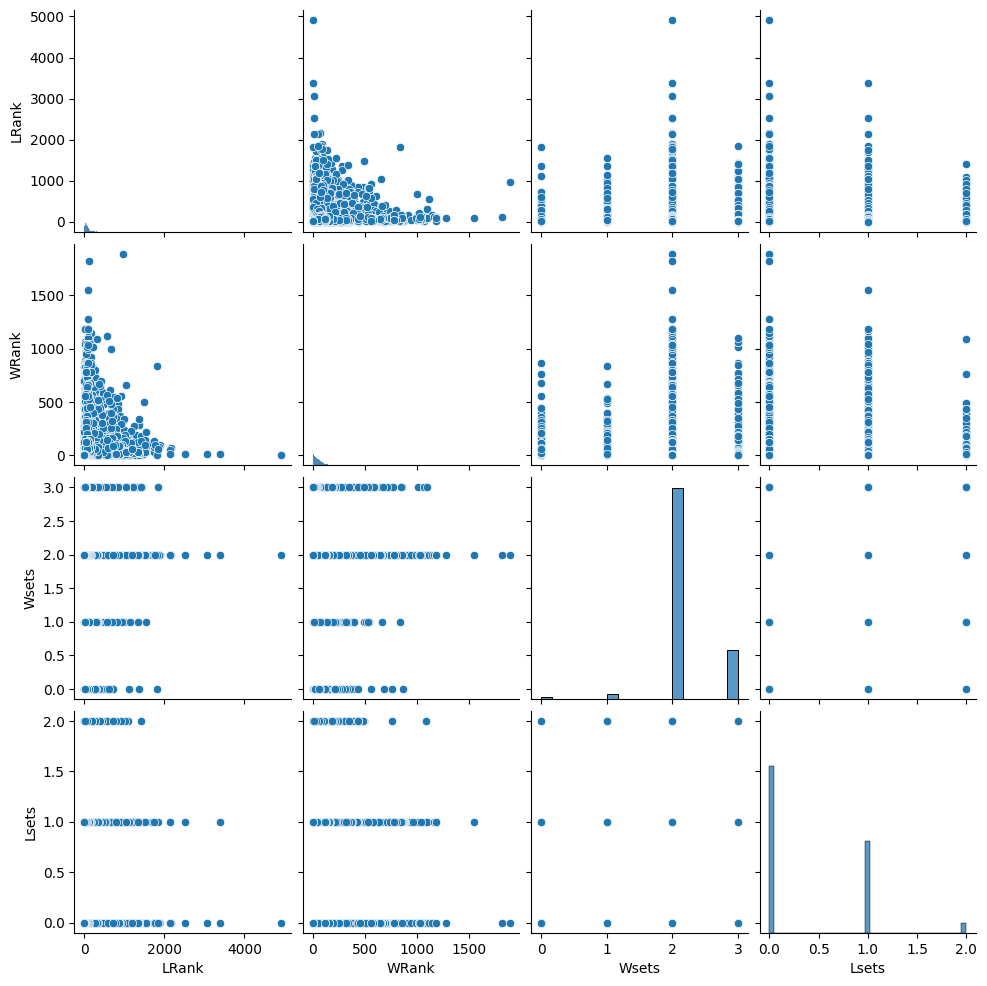

In [36]:
# Заменим значения 'NR' на NaN
games_df['WRank'] = games_df['WRank'].replace('NR', np.nan)
games_df['LRank'] = games_df['LRank'].replace('NR', np.nan)

sns.pairplot(games_df[['LRank', 'WRank', 'Wsets', 'Lsets']])

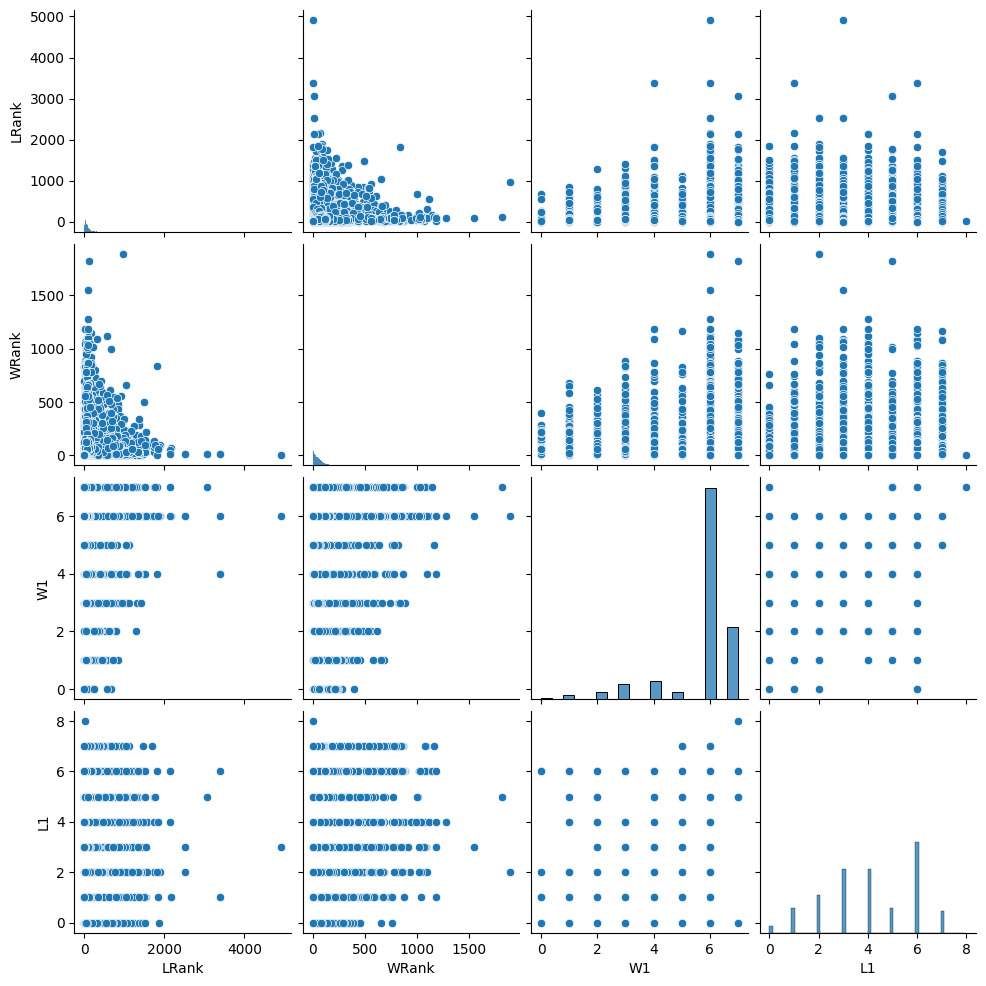

In [37]:
sns.pairplot(games_df[['LRank', 'WRank', 'W1', 'L1']])

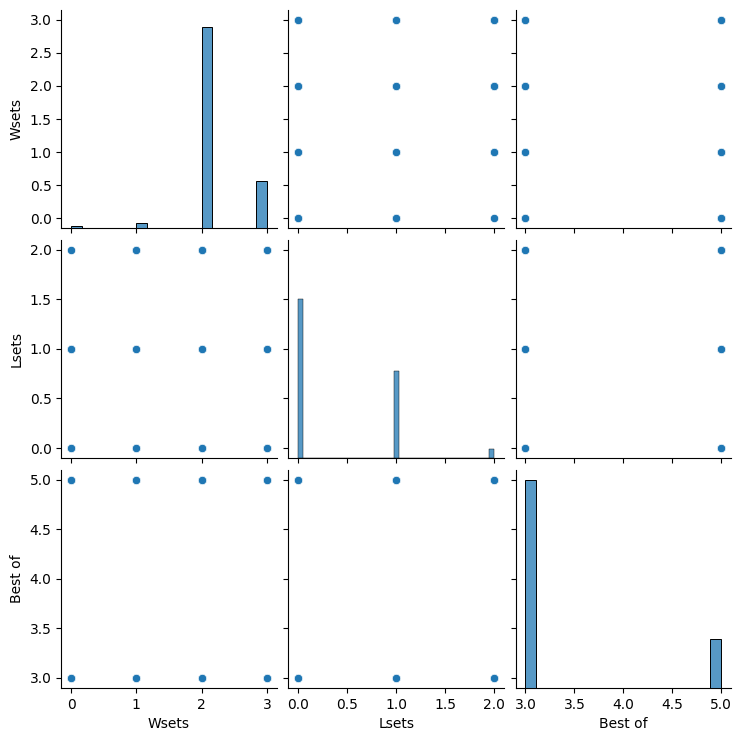

In [38]:
sns.pairplot(games_df[['Wsets', 'Lsets', 'Best of']])

C:\Users\markz\AppData\Local\Temp\ipykernel_17980\1331788309.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(games_df['Wsets'].dropna().astype('int64'))


<Axes: xlabel='Wsets', ylabel='Density'>

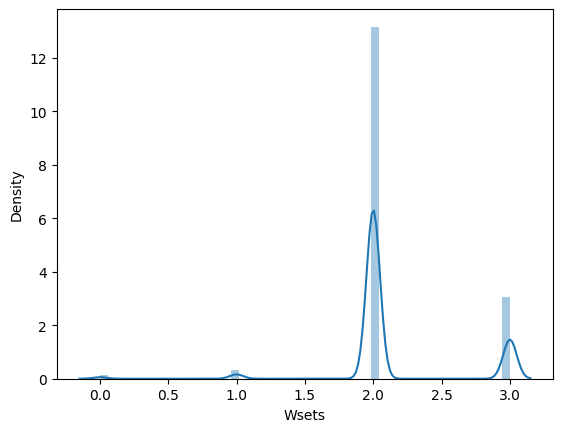

In [40]:
# Гистограма
sns.distplot(games_df['Wsets'].dropna().astype('int64'))

C:\Users\markz\AppData\Local\Temp\ipykernel_17980\275292391.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(games_df['Lsets'].dropna().astype('int64'))


<Axes: xlabel='Lsets', ylabel='Density'>

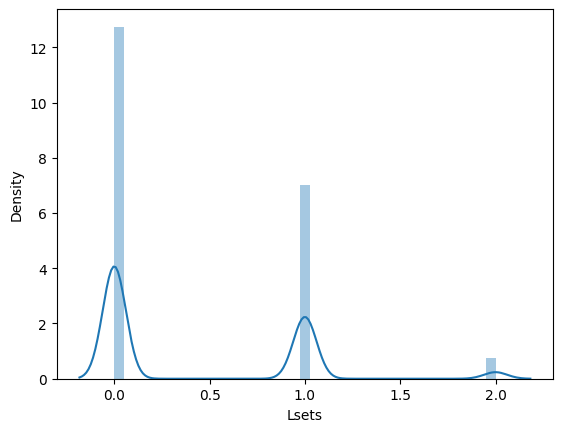

In [42]:
sns.distplot(games_df['Lsets'].dropna().astype('int64'))

C:\Users\markz\AppData\Local\Temp\ipykernel_17980\3037858805.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(games_df['W1'].dropna().astype('int64'))


<Axes: xlabel='W1', ylabel='Density'>

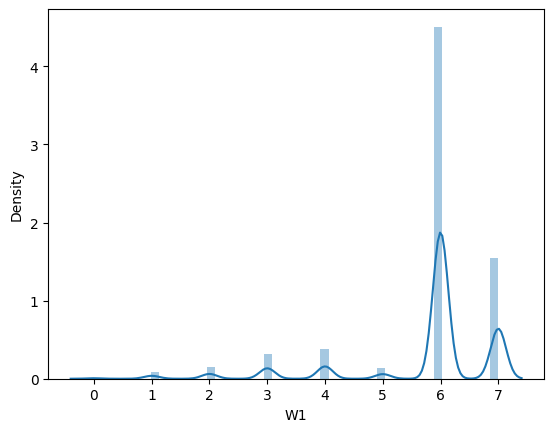

In [45]:
sns.distplot(games_df['W1'].dropna().astype('int64'))

C:\Users\markz\AppData\Local\Temp\ipykernel_17980\1970144466.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(games_df['L1'].dropna().astype('int64'))


<Axes: xlabel='L1', ylabel='Density'>

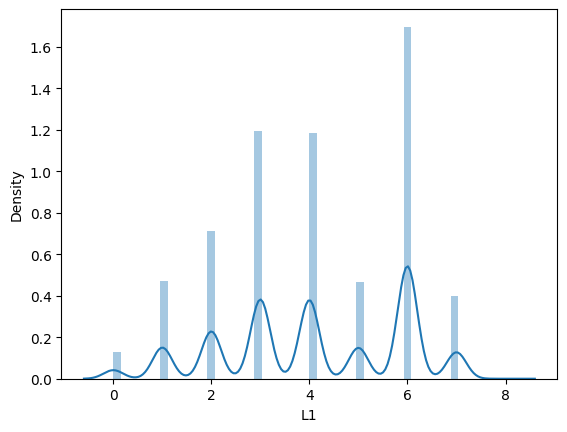

In [46]:
sns.distplot(games_df['L1'].dropna().astype('int64'))

<Axes: >

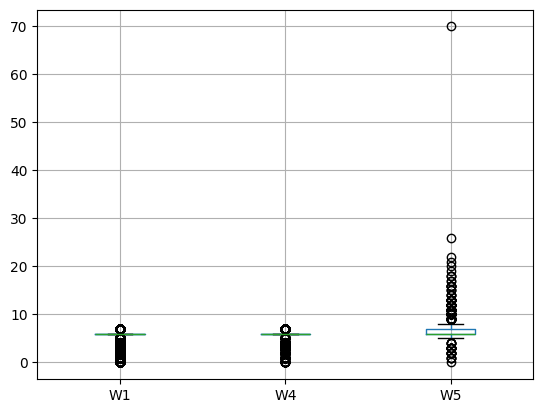

In [47]:
games_df[['W1', 'W2', 'W3', 'W4', 'W5']].boxplot()

<Axes: >

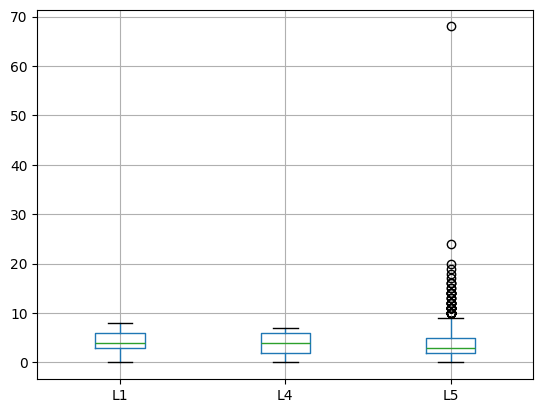

In [48]:
games_df[['L1', 'L2', 'L3', 'L4', 'L5']].boxplot()

Рассмотрим данные из файла atp_players.csv.

In [49]:
players_df.describe()

,birth_year,birth_month,birth_day,turned_pro,weight_lbs,weight_kg,height_inches,height_cm
count,5114.000000,5114.000000,5114.000000,1533.000000,2706.000000,2706.000000,2658.000000,2658.000000
mean,1968.991201,6.134142,15.437427,1807.857143,165.145972,74.941242,69.377728,176.197517
std,24.776571,3.414743,8.746428,584.589088,44.659854,20.263036,14.765292,37.510783
min,1864.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1958.000000,3.000000,8.000000,1988.000000,160.000000,73.000000,70.000000,178.000000
50%,1976.000000,6.000000,15.000000,1996.000000,170.000000,77.000000,72.000000,183.000000
75%,1988.000000,9.000000,23.000000,2003.000000,180.000000,82.000000,74.000000,188.000000
max,2001.000000,12.000000,31.000000,2017.000000,1488.000000,675.000000,83.000000,211.000000


C:\Users\markz\AppData\Local\Temp\ipykernel_17980\3184148450.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(players_df.birth_year.astype('float64'))


<Axes: xlabel='birth_year', ylabel='Density'>

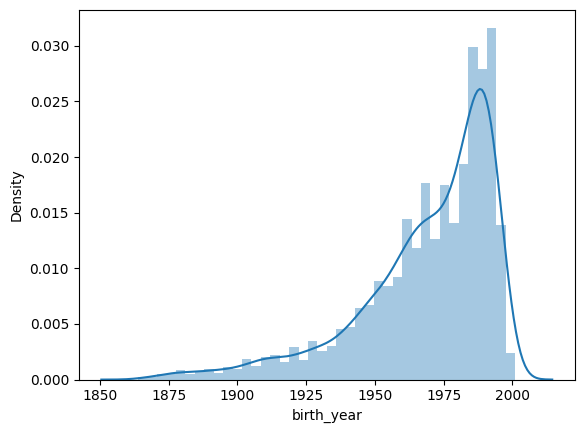

In [50]:
# Replace 'NR' values with NaN
players_df['birth_year'] = players_df['birth_year'].replace('NR', np.nan)

sns.distplot(players_df.birth_year.astype('float64'))

C:\Users\markz\AppData\Local\Temp\ipykernel_17980\2951901529.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(players_df.weight_kg.astype('float64'))


<Axes: xlabel='weight_kg', ylabel='Density'>

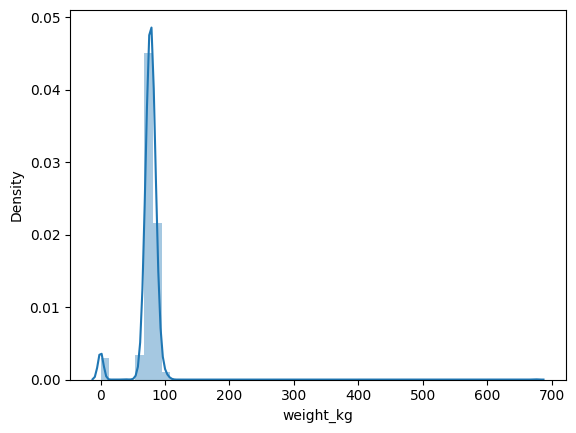

In [51]:
sns.distplot(players_df.weight_kg.astype('float64'))

C:\Users\markz\AppData\Local\Temp\ipykernel_18344\2589370917.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(players_df.height_cm.astype('float64'))


<AxesSubplot:xlabel='height_cm', ylabel='Density'>

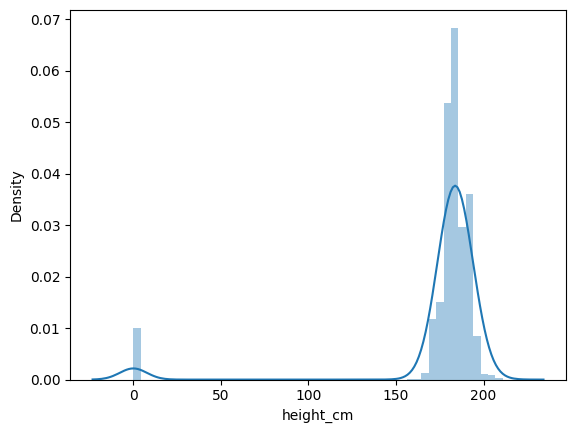

In [7]:
sns.distplot(players_df.height_cm.astype('float64'))

# 4. Проверка качества данных

Проверю качество набора данных games_df

In [52]:
# Проверим дублирующиеся строки
games_df[games_df.duplicated(keep=False)]

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL


In [54]:
# Проверим выбросы
games_df[(np.abs(stats.zscore(games_df.select_dtypes(include=int))) > 3).any(axis=1)]

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL


In [60]:
# Проверим % пропущенных данных
games_df.isnull().sum()/66702

ATP           0.000000
Location      0.000000
Tournament    0.000000
Date          0.000000
Series        0.000000
Court         0.000000
Surface       0.000000
Round         0.000000
Best of       0.000225
Winner        0.000000
Loser         0.000000
WRank         0.000345
LRank         0.002114
W1            0.005487
L1            0.005442
W2            0.014512
L2            0.014497
W3            0.533252
L3            0.533267
W4            0.905850
L4            0.905850
W5            0.964319
L5            0.964319
Wsets         0.004872
Lsets         0.004902
Comment       0.000000
CBW           0.737549
CBL           0.737549
GBW           0.924215
GBL           0.924215
IWW           0.799736
IWL           0.799736
SBW           0.918683
SBL           0.918683
B365W         0.130671
B365L         0.130326
B&WW          0.983554
B&WL          0.983554
EXW           0.409148
EXL           0.409073
PSW           0.225241
PSL           0.225241
WPts          0.243021
LPts       

In [56]:
players_df.nunique()

player_id        10911
first_name        2922
first_initial      353
last_name         7798
full_name        10477
player_url       10911
flag_code          113
residence         1133
birthplace        1830
birthdate         4576
birth_year         135
birth_month         12
birth_day           31
turned_pro          55
weight_lbs          91
weight_kg           53
height_ft           23
height_inches       23
height_cm           23
handedness           3
backhand             2
dtype: int64

Проверю качество файла atp_players.csv.

In [57]:
players_df[players_df.duplicated(keep=False)]

,player_id,first_name,first_initial,last_name,full_name,player_url,flag_code,residence,birthplace,birthdate,...,birth_month,birth_day,turned_pro,weight_lbs,weight_kg,height_ft,height_inches,height_cm,handedness,backhand
9999,v007,Jerome,J,Vanier,Vanier J,http://www.atpworldtour.com/en/players/jerome-...,FRA,NaN,"Boulogne, France",19571102,...,11.0,2.0,NaN,154.0,70.0,"5'9""",69.0,175.0,NaN,NaN
10000,v007,Jerome,J,Vanier,Vanier J,http://www.atpworldtour.com/en/players/jerome-...,FRA,NaN,"Boulogne, France",19571102,...,11.0,2.0,NaN,154.0,70.0,"5'9""",69.0,175.0,NaN,NaN


In [58]:
players_df[(np.abs(stats.zscore(players_df.select_dtypes(include=int))) > 3).any(axis=1)]

,player_id,first_name,first_initial,last_name,full_name,player_url,flag_code,residence,birthplace,birthdate,...,birth_month,birth_day,turned_pro,weight_lbs,weight_kg,height_ft,height_inches,height_cm,handedness,backhand


In [61]:
players_df.isnull().sum()/10912

player_id        0.000000
first_name       0.000000
first_initial    0.002474
last_name        0.000000
full_name        0.000000
player_url       0.000000
flag_code        0.200238
residence        0.815433
birthplace       0.721591
birthdate        0.531342
birth_year       0.531342
birth_month      0.531342
birth_day        0.531342
turned_pro       0.859512
weight_lbs       0.752016
weight_kg        0.752016
height_ft        0.756415
height_inches    0.756415
height_cm        0.756415
handedness       0.895894
backhand         0.895894
dtype: float64

In [62]:
players_df.nunique()

player_id        10911
first_name        2922
first_initial      353
last_name         7798
full_name        10477
player_url       10911
flag_code          113
residence         1133
birthplace        1830
birthdate         4576
birth_year         135
birth_month         12
birth_day           31
turned_pro          55
weight_lbs          91
weight_kg           53
height_ft           23
height_inches       23
height_cm           23
handedness           3
backhand             2
dtype: int64